# Part II - (Airline On-Time Performance Data)
## by (Ayoub Elkhaddouri)

## Investigation Overview


Dans cette étude, je voulais voir comment les latences sont distribuées et s'il y a des fonctionnalités qui leur sont associées.

## Dataset Overview

Cet ensemble de données contient des informations sur des millions de vols aux États-Unis pour 2008. Il contient de nombreuses informations de base telles que la date, l'heure, la compagnie aérienne, les retards et les annulations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
plt.rcParams.update({'font.size': 20})

# suppress warnings from final output

warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/2008.csv')


In [3]:
def nuage_point(df, name_column_x, name_column_y, title, xlabel, ylabel,
                fig=(15, 10)):
    plt.figure(figsize=fig)
    plt.scatter(data=df, x=name_column_x, y=name_column_y)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.show()

In [4]:
df.drop_duplicates(inplace=True)
df.drop(['DepTime', 'ArrTime', 'Year'], axis=1, inplace=True)
df['Cancelled'] = df.Cancelled.astype('bool')
df['Diverted'] = df.Cancelled.astype('bool')
df = df.query('ArrDelay <= 1400 and DepDelay <= 1400')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
### Répartition des retards
-  les retarids les plus populaires sont d'environ 30 minutes
- Pour les retards vraiment importants, environ de 16 heures

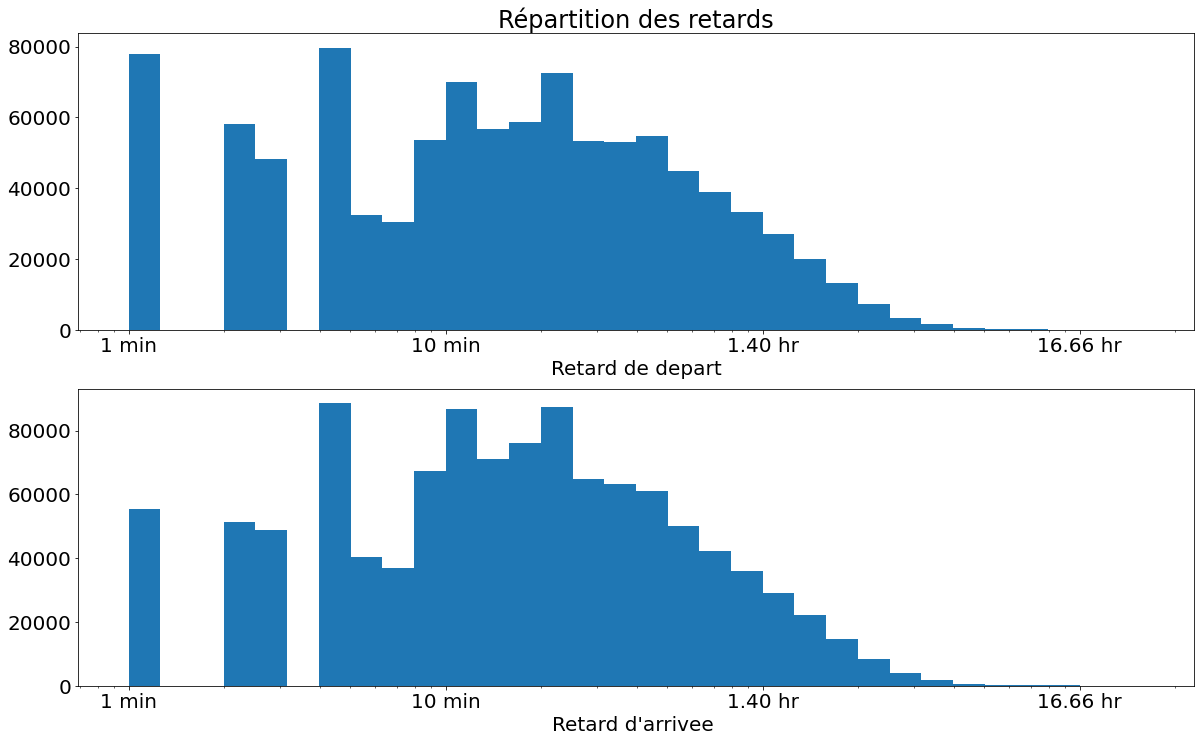

In [5]:
bins = 10 ** np.arange(0, np.log10(df.DepDelay.max())+0.1, 0.1)
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.hist(data=df, x='DepDelay', bins=bins)
plt.xscale('log')
plt.xlabel('Retard de depart')
plt.xticks([1, 10, 100, 1000], ['1 min', '10 min', '1.40 hr', '16.66 hr']);
plt.title('Répartition des retards');

bins = 10 ** np.arange(0, np.log10(df.ArrDelay.max())+0.1, 0.1)
plt.subplot(2, 1, 2)
plt.hist(data=df, x='ArrDelay', bins=bins)
plt.xscale('log')
plt.xlabel('Retard d\'arrivee ')
plt.xticks([1, 10, 100, 1000], ['1 min', '10 min', '1.40 hr', '16.66 hr']);

## (Visualization 2)
### Compagnies  et le temps du retards de départ

- Les compagnies aériennes B6, UA, 9E ont les plus grands retards de départ.

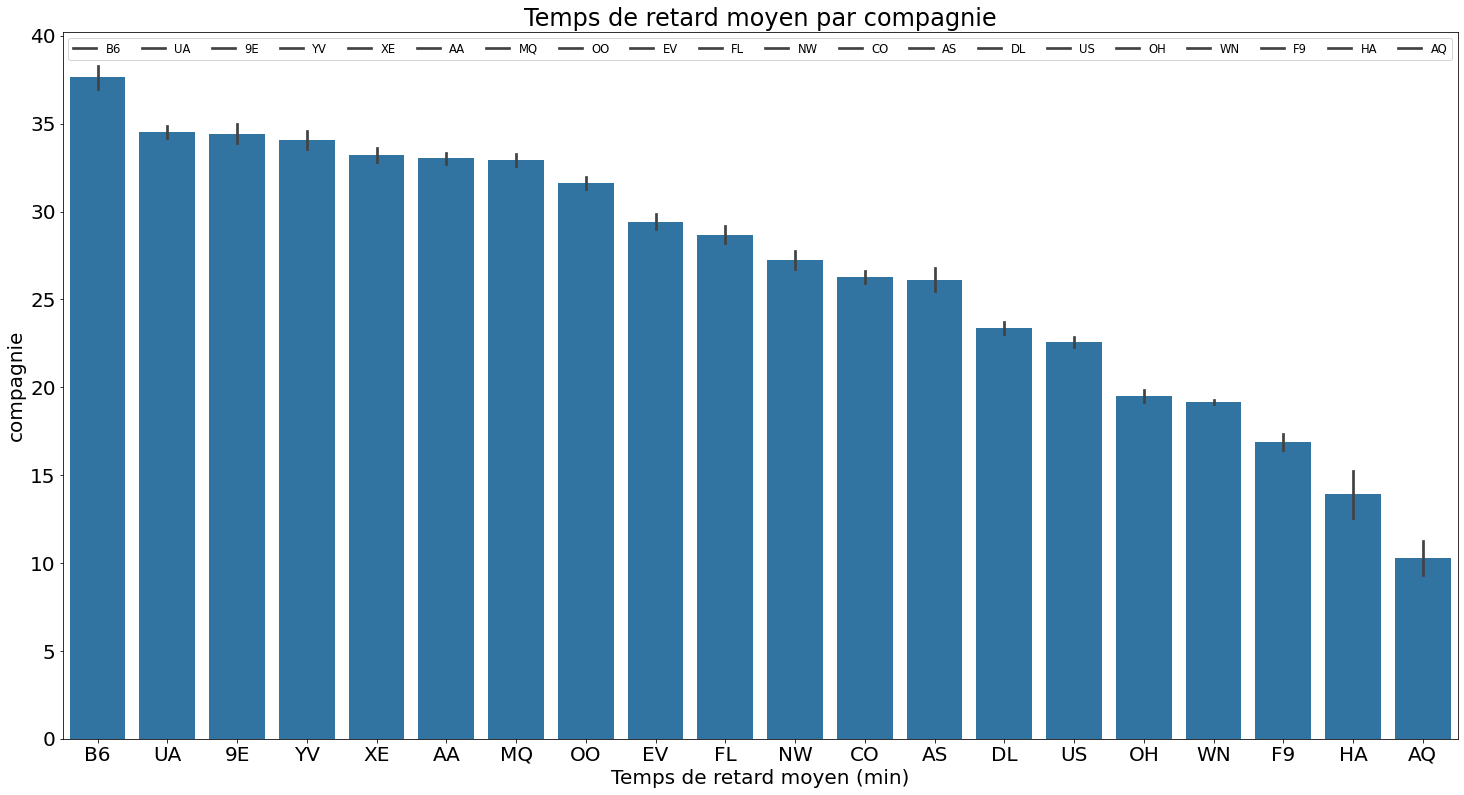

In [6]:
plt.figure(figsize=(25, 13))
base_color = sb.color_palette()[0]
order = df.query('DepDelay >= 0').groupby('UniqueCarrier').DepDelay.mean().sort_values(ascending=False).index
sb.barplot(data=df.query('DepDelay >= 0'), x='UniqueCarrier',
           y='DepDelay', order=order, color=base_color);
plt.ylabel('compagnie')
plt.xlabel('Temps de retard moyen (min)')
plt.title('Temps de retard moyen par compagnie')
plt.legend(order, fontsize="xx-small", loc="upper left", mode = "expand", ncol = len(order));


## (Visualization 3)
### Origine et retard
- on peut voir que ORD a la plus grande moyenne de retards.


In [7]:
df_clean_origin = df.Origin.value_counts().sort_values(ascending=False).reset_index(name='counts').head(10)
df_clean_origin = df[df.Origin.isin(df_clean_origin['index'].tolist())]

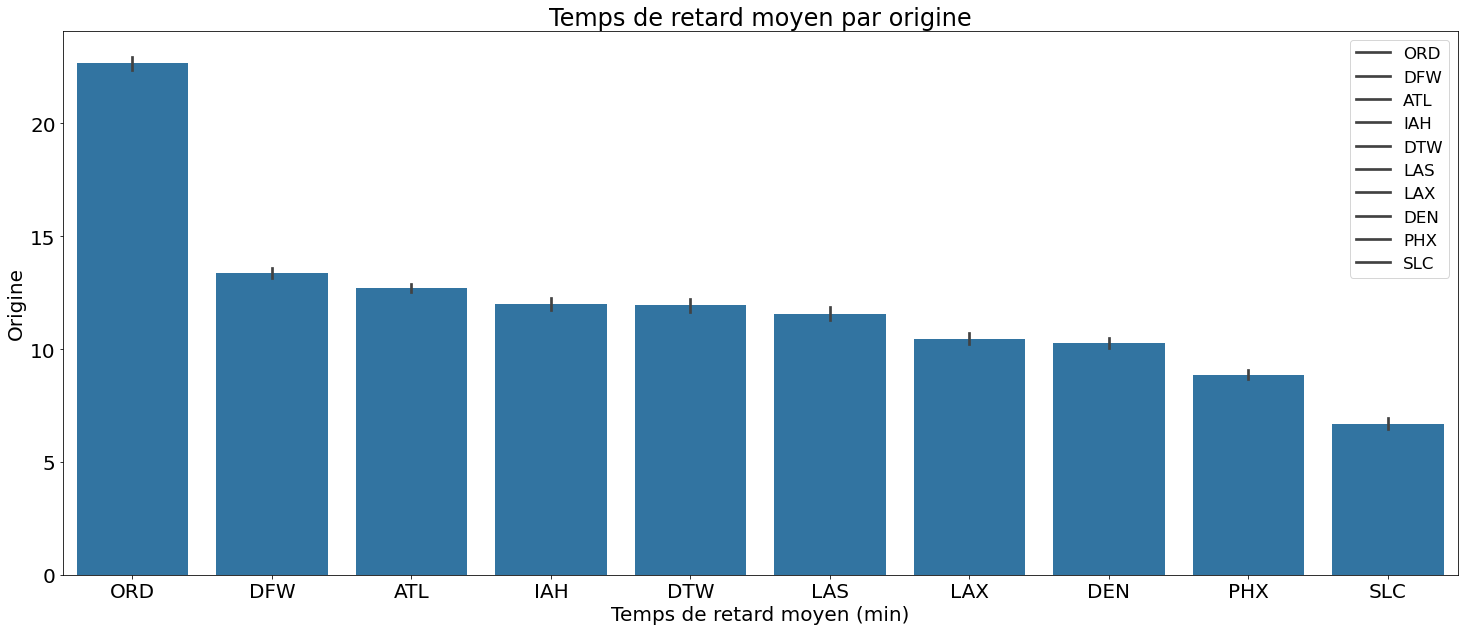

In [8]:
plt.figure(figsize=(25, 10))
order = df_clean_origin.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index
sb.barplot(data=df_clean_origin, x='Origin', y='DepDelay', color=base_color, order=order)
plt.ylabel('Origine')
plt.xlabel('Temps de retard moyen (min)')
plt.title('Temps de retard moyen par origine')
plt.legend(order, fontsize="small", loc="upper right");

## (Visualization 4)
### La relation entre le Retard de départ et le Retard d'arrivée
- on peut voir ici une forte correlation positive entre les deux variable

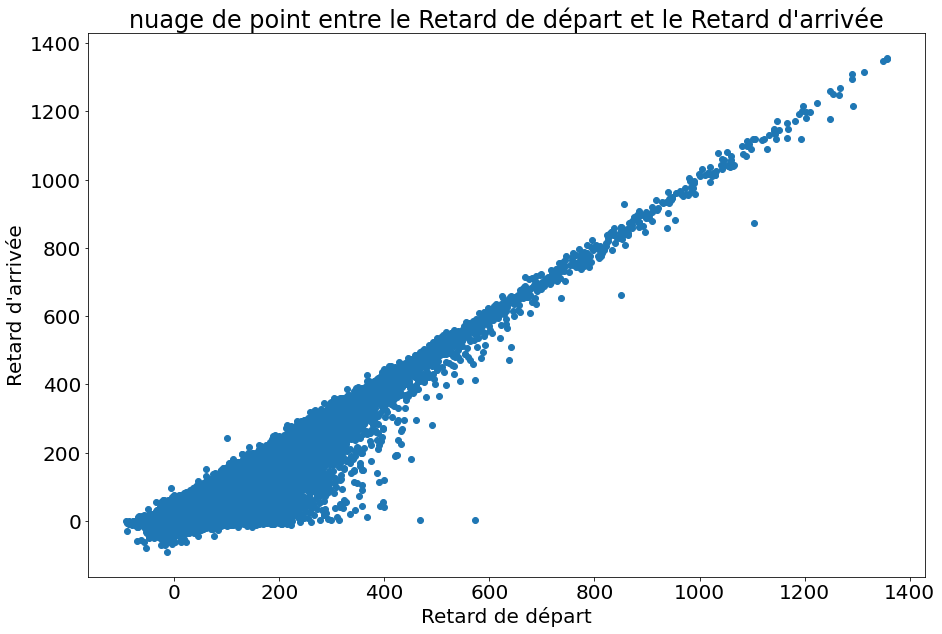

In [9]:
nuage_point(df, 'ArrDelay', 'DepDelay', 'nuage de point'
            ' entre le Retard de départ et le Retard d\'arri'
            'vée', 'Retard d\'arrivée', 'Retard de départ')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 777166 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
